In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDClassifier, LinearRegression
import time
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
    train_errors, val_errors = [], []
    for m in range(1, len(X_train),10000):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val) 
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m])) 
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train") 
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

In [2]:
# Load Data
FaultSect = pd.read_csv('data/Mon_Dis_JPCC_FAULT_SECT.csv')
CrackIdx = pd.read_csv('data/Mon_Dis_JPCC_CRACK_INDEX.csv')
Rev = pd.read_csv('data/Mon_Dis_JPCC_REV.csv')
TST = pd.read_csv('data/TST_L05B.csv')

In [3]:
FaultSect = FaultSect[['STATE_CODE','SHRP_ID','CRACK_OR_JOINT_EXP','AVG_EDGE_FAULT','AVG_WHEELPATH_FAULT']].dropna()
FaultSectCorJ = LabelEncoder().fit_transform(FaultSect['CRACK_OR_JOINT_EXP'])
# FaultSect

In [4]:
CrackIdx = CrackIdx[['STATE_CODE','SHRP_ID','SURVEY_DATE','HPMS16_CRACKING_PERCENT_JPCC']].dropna()
# CrackIdx

In [5]:
TST = TST[['SHRP_ID','MATL_CODE']]
TST_MATL = OneHotEncoder().fit_transform(TST['MATL_CODE'].values.reshape(-1,1))

/Users/Crear/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [6]:
print(np.shape(FaultSect),np.shape(CrackIdx),np.shape(Rev),np.shape(TST))

(6254, 5) (5385, 4) (5422, 71) (38281, 2)


In [7]:
Prepared_data = pd.merge(FaultSect,TST, on = 'SHRP_ID')
Target_Labels = OneHotEncoder().fit_transform(Prepared_data['MATL_CODE'].values.reshape(-1,1)).toarray()
Prepared_data = Prepared_data.drop(columns='MATL_CODE')
Prepared_data = Prepared_data.drop(columns='SHRP_ID')
Prepared_data['CRACK_OR_JOINT_EXP'] = LabelEncoder().fit_transform(Prepared_data['CRACK_OR_JOINT_EXP'])


/Users/Crear/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [8]:
st = time.time()
tree_reg = DecisionTreeRegressor()
tree_scores = cross_val_score(tree_reg, Prepared_data, Target_Labels,scoring="neg_mean_squared_error", cv=10) 
rmse_scores = np.sqrt(-tree_scores)
print('Time used:',time.time()-st)
print('rmse scores:',rmse_scores)

Time used: 49.15688896179199
rmse scores: [0.09965147 0.0989872  0.10074437 0.10235761 0.10101322 0.10055833
 0.10087595 0.09983454 0.1014494  0.10266313]


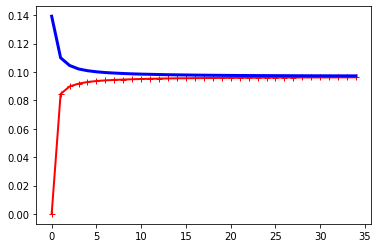

In [9]:
plot_learning_curves(tree_reg, Prepared_data, Target_Labels)

/Users/Crear/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Crear/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Crear/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Crear/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Crear/opt/anaconda3/l

Time used: 347.5908958911896
rmse scores: [0.099198   0.09883353 0.10037169 0.1014437  0.10038469 0.10013052
 0.10053197 0.09933463 0.10093838 0.10214623]


/Users/Crear/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


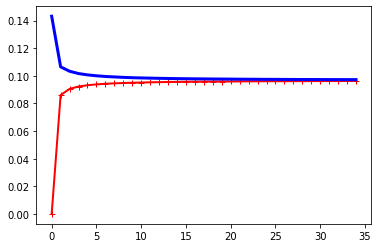

In [10]:
st = time.time()
forest_reg = RandomForestRegressor()
forest_scores = cross_val_score(forest_reg, Prepared_data, Target_Labels,scoring="neg_mean_squared_error", cv=10) 
rmse_scores = np.sqrt(-forest_scores)
print('Time used:',time.time()-st)
print('rmse scores:',rmse_scores)
plot_learning_curves(forest_reg, Prepared_data, Target_Labels)

Time used: 11.635943174362183
rmse scores: [0.09801951 0.09818737 0.09875211 0.09988772 0.09933417 0.09905901
 0.09828186 0.09831253 0.0993625  0.10056647]


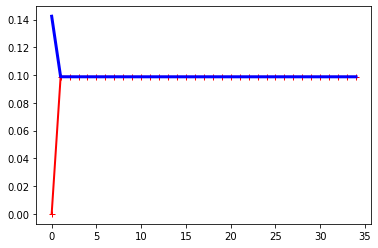

In [11]:
st = time.time()
lin_reg_model = LinearRegression()
lin_scores = cross_val_score(lin_reg_model, Prepared_data, Target_Labels,scoring="neg_mean_squared_error", cv=10) 
rmse_scores = np.sqrt(-lin_scores)
print('Time used:',time.time()-st)
print('rmse scores:',rmse_scores)
plot_learning_curves(lin_reg_model, Prepared_data, Target_Labels)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde4804de10>,
      dtype=object)

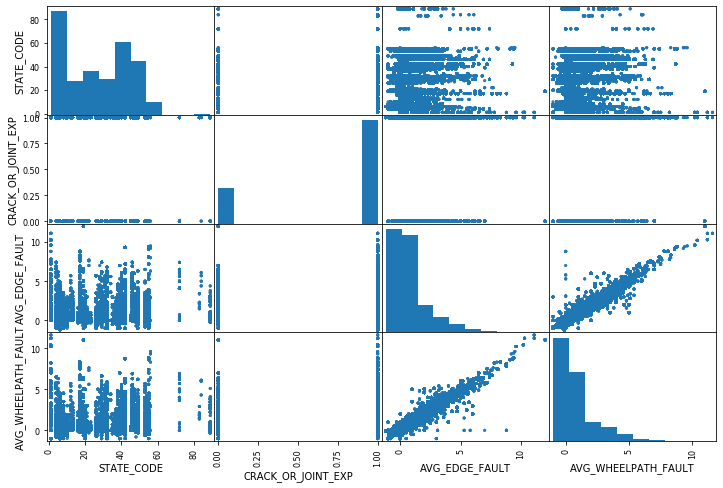

In [12]:
from pandas.plotting import scatter_matrix
attributes = [col for col in Prepared_data.columns]
scatter_matrix(Prepared_data[attributes], figsize=(12, 8))